# Global Observations of Nonlinear Mesoscale Eddies 
<div class="alert alert-block alert-info">
<b>The purpose of this notebook is to:</b>
    <li>Read in eddy-tracking datasets</li>
    <li>Process the datasets to only include WCR- and CCR-like eddies in the Northwest Atlantic</li>
    <li>Plot the formation patterns, seasonal cycles, and formation trends of the eddies</li>
</div>

### Datasets: 
☆<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta2-0-dt.html">The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0) </a> <br>
The primary dataset used in this notebook is *The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0)* and colloquially referred to the *Chelton eddy tracks* here. The current verison of the Chelton eddy dataset is described in <a href="https://www.aviso.altimetry.fr/fileadmin/documents/data/products/value-added/Schlax_Chelton_2016.pdf"> Schlax & Chelton, 2016</a> which built upon <a href="https://www.sciencedirect.com/science/article/pii/S0079661111000036"> Chelton et al., 2011</a>. 

<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta3-1-exp-dt.html">The Mesoscale Eddy Trajectories Atlas (META3.1EXP) </a> <br>
The *Mesoscale Eddy Trajectories Atlas Product Verison 3.1 Experimental Delayed Time (META3.1EXP DT)* was first published in March 2022 and is an update to META2.0. The details of this dataset are described <a href="https://essd.copernicus.org/articles/14/1087/2022/"> Pegliasco et al., 2022</a> which inherited an eddy-tracking algorithm developed by <a href="https://journals.ametsoc.org/view/journals/atot/31/5/jtech-d-14-00019_1.xml"> Mason et al., 2014</a> that is inpsired by Chelton et al., 2011.

<a href="https://zenodo.org/record/7349753">The Global Lagrangian Eddy Dataset (GLED v1.0) </a> <br>
The third eddy dataset differs from the META datasets because it uses Lagrangian methods to identify and track eddies. This dataset was created by <a href="https://essd.copernicus.org/articles/15/1765/2023/"> Liu and Abernathy, 2023</a> as the Lagrangian alternative to Eulerian eddy datasets like the Chelton eddy tracks and all the successive Eulerian eddy datasets inspired by Chelton et al., 2011. 

<a href="https://www.bco-dmo.org/dataset/810182">Yearly census of Gulf Stream Warm Core Ring formation from 1980 to 2017</a><br>
The WCR census uses the <a href="https://jcgulfstream.com/charts/">Clark charts</a> to document the formation and demise times and locations, and the area at formation for all WCRs formed between 1980 and 2017 that lived for a week or more. 

### Motivation: 
<a href="https://www.nature.com/articles/s41598-019-48661-9"> Gangopadhyay et al., 2019</a> found a regime shift in the number of warm core rings formations between 1980–1999 and 2000–2017. <a href="https://www.nature.com/articles/s41598-021-81827-y"> Silver et al., 2021</a> expanded upon this work and also found a regime shift in warm core rings, but *no* regime shift in cold core rings. **We seek to understand if a regime shift, and similar results, can be detected using a global mesoscale eddy dataset such as META2.0.** 

<div class="alert alert-block alert-info">
<b>The goal of this work is to:</b>
    <li>Repeat similar analyses as Silver et al., 2021 for eddy datasets that have been filtered to only include warm core ring- and cold core ring-like eddies</li>
    <li>Check if these eddy datasets detect a regime shift in Gulf Stream rings</li>
    <li>Analyize the formation patterns, seasonal cycles, and formation trends of the eddies</li>
    <li>Test if META2.0 and similar products could be used to study Gulf Stream rings</li>
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> The META2.0 dataset, or Chelton eddy tracks, are no longer recommended for use. Instead, AVISO reccomends using META3.1EXP. When this project began, that warning did not exist and META3.1EXP had not been published. Hence why we primarily use the META2.0 dataset.
</div>

***

This project's folder looks like:<br>
<UL> <b>rings</b>
      <UL> <b>data</b> <br>
      <UL> dataframes <br> </UL>
      <UL> GLED <br> </UL>
      <UL> gulf_stream <br> </UL>
      <UL> META <br> </UL>
      <UL> OISST <br> </UL>
      <UL> ring_census <br> </UL>
      <UL> SSH <br> </UL>
      <b>figures</b><br>
      <UL> animation_plots</UL>
      <b>rings_repo</b> <br>
      <UL> <font color='red'>notebooks ☆</font> <br>
      utils <br></UL>
</UL>
    
***
    
## Import Functions:

In [1]:
%%time
# adds upper level to working directory, this is where the utility scripts' folder is saved
import sys
sys.path.append("..")

# import the util functions
from utils.eddy_plot_utils import *
# from utils.eddy_data_utils import *
from utils.new_eddy_data_utils import *

CPU times: user 1.5 s, sys: 205 ms, total: 1.71 s
Wall time: 2.2 s


## Load Data:

In [2]:
%%time
#################################################################################################################

# Bathymetry of Northwest Atlantic
bathy = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/nwa_bathy.nc')

#################################################################################################################
#################################################################################################################

# META2.0 ring-like eddies
zone_ccrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_ccrlike_eddies.pkl')
zone_wcrs = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_wcrlike_eddies.pkl') 

# META3.1 ring-like eddies

#################################################################################################################
#################################################################################################################

# GLED ring-like eddies


#################################################################################################################


CPU times: user 2 s, sys: 760 ms, total: 2.76 s
Wall time: 3.01 s


In [51]:
%%time
""""""""""""""""""""""""""""""""""""""" wcr-like eddies """""""""""""""""""""""""""""""""""""""""""""""""""
wcrlike_tracks = []
# loop through each eddy to determine if it is wcr-like
for i in np.array(anticyclonic_eddy_df['track'].unique()):
    anticyclonic_eddy = anticyclonic_eddy_df[anticyclonic_eddy_df['track']==i]
    if ((anticyclonic_eddy['time'].dt.year<2018).all()): # stops at 2017 because that is common cut-off year
        if is_wcrlike(anticyclonic_eddy).all():
            wcrlike_tracks.append(i)

# only incude eddies that are wcr-like
eddy_wcrlike_df = anticyclonic_eddy[anticyclonic_eddy['track'].isin(wcrlike_tracks)]

# save wcr-like df as pickled file
eddy_wcrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_wcrlike_eddies.pkl') 


# """"""""""""""""""""""""""""""""""""""" ccr-like eddies """""""""""""""""""""""""""""""""""""""""""""""""""
# ccrlike_tracks = []
# # loop through each eddy to determine if it is ccr-like
# for i in np.array(cyclonic_eddy_df['track'].unique()):
#     cyclonic_eddy = anticyclonic_eddy_df[cyclonic_eddy_df['track']==i]
#     if ((cyclonic_eddy['time'].dt.year<2018).all()): # stops at 2017 because that is common cut-off year
#         if is_ccrlike(cyclonic_eddy).all():
#             ccrlike_tracks.append(i)

# # only incude eddies that are wcr-like
# eddy_ccrlike_df = cyclonic_eddy[cyclonic_eddy['track'].isin(ccrlike_tracks)]

# # save ccr-like df as pickled file
# eddy_ccrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_ccrlike_eddies.pkl') 

In [52]:
eddy_wcrlike_df

,amplitude,cyclonic_type,latitude,longitude,observation_flag,observation_number,speed_average,speed_radius,time,track
obs,,,,,,,,,,


In [6]:
%%time
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function Description:                                                                                   "
"    The meta_eddy_to_nwa_ringlike_eddies function reads in META eddy datasets and converts it to         " 
"    a pandas dataframe, filters out eddies that don't qualify as WCR-like or CCR-like, and saves         "
"    the WCR-like and CCR-like eddy dataframes in the data/dataframes folder.                             "
"                                                                                                         "
" Input:                                                                                                  " 
"    none                                                                                                 "
"                                                                                                         "
" Output:                                                                                                 "
"    ringlike_eddies (DataFrame) : pandas dataframe of eddy trajectories for wcr-like and ccr-like eddies "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

def meta_eddy_to_nwa_ringlike_eddies():
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                                 read in META eddy trajectory datasets                                   "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # read in META2.0 .nc file as xarray dataset
    meta2_ds = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/META/META2_0/eddy_trajectory_dt_2.0_19930101_20200307.nc')

    # convert xr dataset to pandas dataframe
    meta2_df = meta2_ds.to_dataframe()
    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                        restrict dataset to nwa box & change lon to -180 to 180                          "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    # bounding box for NWA based on Gangopadhyay et al., 2019
    zone_lat = [30,45] # N
    zone_lon = [[-75,-55],[-75,-70],[-70,-65],[-65,-60],[-60,-55]] # W ... 0 –> all zones, 1 –> zone 1, etc.
    
    # cut eddy trajectory dataframe down to NWA region
    meta2_df = meta2_df[(meta2_df['longitude'] >= zone_lon[0][0]) & (meta2_df['longitude'] <= zone_lon[0][1]) & (meta2_df['latitude'] >= zone_lat[0]) & (meta2_df['latitude'] <= zone_lat[1])]

    # change longitude from 0 to 360 --> -180 to 180
    meta2_df['longitude'] = ((((meta2_df['longitude'] + 180) % 360) - 180))
     
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                                 filter for wcr-like & ccr-like eddies                                   "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # separate anticyclonic and cyclonic eddies into their own dataframes
    anticyclonic_eddy_df = meta2_df[meta2_df['cyclonic_type']==1]
    cyclonic_eddy_df = meta2_df[meta2_df['cyclonic_type']==-1]

    """"""""""""""""""""""""""""""""""""""" wcr-like eddies """""""""""""""""""""""""""""""""""""""""""""""""""
    wcrlike_tracks = []
    # loop through each eddy to determine if it is wcr-like
    for i in np.array(anticyclonic_eddy_df['track'].unique()):
        anticyclonic_eddy = anticyclonic_eddy_df[anticyclonic_eddy_df['track']==i]
        if ((anticyclonic_eddy['time'].dt.year<2018).all()): # stops at 2017 because that is common cut-off year
            if is_wcrlike(anticyclonic_eddy).all():
                wcrlike_tracks.append(i)

    # only incude eddies that are wcr-like
    eddy_wcrlike_df = anticyclonic_eddy[anticyclonic_eddy['track'].isin(wcrlike_tracks)]
    
    # save wcr-like df as pickled file
    eddy_wcrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_wcrlike_eddies.pkl') 
    
    
    """"""""""""""""""""""""""""""""""""""" ccr-like eddies """""""""""""""""""""""""""""""""""""""""""""""""""
    ccrlike_tracks = []
    # loop through each eddy to determine if it is ccr-like
    for i in np.array(cyclonic_eddy_df['track'].unique()):
        cyclonic_eddy = anticyclonic_eddy_df[cyclonic_eddy_df['track']==i]
        if ((cyclonic_eddy['time'].dt.year<2018).all()): # stops at 2017 because that is common cut-off year
            if is_ccrlike(cyclonic_eddy).all():
                ccrlike_tracks.append(i)

    # only incude eddies that are wcr-like
    eddy_ccrlike_df = cyclonic_eddy[cyclonic_eddy['track'].isin(ccrlike_tracks)]

    # save ccr-like df as pickled file
    eddy_ccrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/nwa_ccrlike_eddies.pkl') 
    

meta_eddy_to_nwa_eddylike_rings()

,amplitude,cyclonic_type,latitude,longitude,observation_flag,observation_number,speed_average,speed_radius,time,track
obs,,,,,,,,,,
0,0.443,1,-40.024101,19.317505,0,0,0.7345,75150.0,1993-01-01,0
1,0.433,1,-40.086700,19.241699,0,1,0.7723,77600.0,1993-01-02,0
2,0.446,1,-40.090698,19.179794,0,2,0.8118,71250.0,1993-01-03,0
3,0.443,1,-40.116501,19.120300,0,3,0.8208,71300.0,1993-01-04,0
4,0.418,1,-40.182400,19.057404,0,4,0.8263,82350.0,1993-01-05,0
...,...,...,...,...,...,...,...,...,...,...
27880799,0.021,-1,-76.043602,167.140991,0,23,0.0466,71350.0,2020-03-03,379974
27880800,0.024,-1,-76.126900,166.950012,0,24,0.0519,84600.0,2020-03-04,379974
27880801,0.029,-1,-76.148003,167.101990,0,25,0.0576,30950.0,2020-03-05,379974


In [8]:
%%time
eddy_df = df

## WCRs ##
wcr_tracks = []
for i in np.array(wcr_ex1['track'].unique()):
    eddy = eddy_df[eddy_df['track']==i]
    if ((eddy['time'].dt.year<2020).all()): # cuts off at 2018, since GS stop halfway through 2018
        if is_wcr(eddy).all():
            wcr_tracks.append(i)

# cut eddies that aren't ccrs out of eddy df to form ring df
eddy_wcr_df = eddy_df[eddy_df['track'].isin(wcr_tracks)]
eddy_wcr_df

CPU times: user 19min 9s, sys: 19.3 s, total: 19min 28s
Wall time: 19min 31s


,amplitude,cyclonic_type,latitude,longitude,observation_flag,observation_number,speed_average,speed_radius,time,track
obs,,,,,,,,,,
142234,0.121,1,41.308102,-55.842010,0,0,0.5632,43050.0,1993-02-09,1621
142235,0.145,1,41.333302,-55.924988,0,1,0.5669,43050.0,1993-02-10,1621
142236,0.272,1,41.375401,-56.052002,0,2,0.6907,65200.0,1993-02-11,1621
142237,0.326,1,41.426998,-56.147003,0,3,0.7084,78100.0,1993-02-12,1621
142238,0.358,1,41.444901,-56.233002,0,4,0.7283,76900.0,1993-02-13,1621
...,...,...,...,...,...,...,...,...,...,...
13802959,0.035,1,42.001801,-62.920990,0,31,0.1237,35850.0,2019-12-26,185276
13802960,0.027,1,41.975101,-63.066010,0,32,0.1128,35850.0,2019-12-27,185276
13802961,0.025,1,41.992901,-63.106506,1,33,0.1036,40350.0,2019-12-28,185276


In [ ]:
# ) returns true if given eddy is warm core ring, false otherwise

def is_wcr(eddy):
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

This function uses mutliple criterion to filter out warm core rings from mesoscale eddies. The criteria is:
    1) is the eddy anti-cyclonic
    2) is the eddy formed north of -0.25 deg of the GS daily path
    3) is the eddy formed south of +3 deg of the GS daily path
    4) does the eddy propagate westwards
Essentially, we expect to find WCRs between the GS path and the continental shelf.
Since the resolution of the datasets is coarse, we use -0.25 deg margin since our first criteria of
anti-cylonicity would filter out cold core rings from being counted as warm core rings.

Input:
    eddy (DataFrame)  : Pandas DataFrame with data from a single eddy 

Output:
    (bool)            : returns true if eddy is north of Gulf Stream for given date, else returns false

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
eddy_lon = get_eddy_formation_loc(eddy)[0] # lon of eddy formation
eddy_lat = get_eddy_formation_loc(eddy)[1] # lat of eddy formation

eddy_year = get_eddy_formation_time(eddy)[0] # year of eddy formation
eddy_month = get_eddy_formation_time(eddy)[1] # month of eddy formation
eddy_day = get_eddy_formation_time(eddy)[2] # day of eddy formation

gs_lon_np = get_gs_day(eddy_year,eddy_month,eddy_day)[0] # np array of gs lon
gs_lat_np = get_gs_day(eddy_year,eddy_month,eddy_day)[1] # np array of gs lat

gs_lon_len = len(gs_lon_np) # length of gs lon array

eddy_lon_np = np.full(gs_lon_len, eddy_lon) # populate 1D array of gs_lon len with eddy formation lon

min_index = np.argmin(abs(gs_lon_np-eddy_lon_np)) # what index of gs lon array is the closest to eddy formation lon

return ((eddy_lat >= gs_lat_np.T[min_index]-0.25) & (is_geq_500m_isobath(eddy) & (eddy['cyclonic_type']==1).all()) & (eddy_lat <= gs_lat_np.T[min_index]+3) & eddy_moves_west(eddy)) # if true then eddy formation is north of gs path


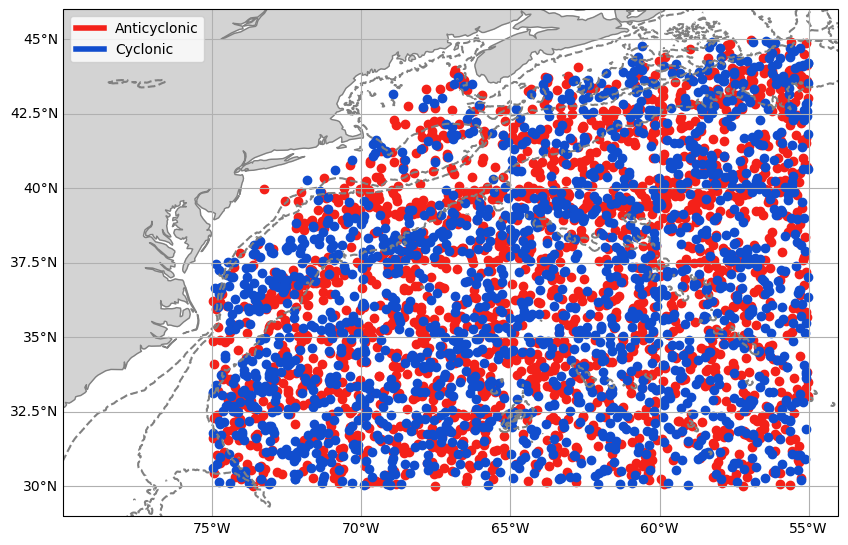

In [10]:
eddy_df = ex1
fig_quality = 100

# gangopadhyay census bounds
x_bnds = [-80,-54] # lon, NWA: [-82,-48]
y_bnds = [29,46] # lat, NWA: [24,53]

proj = ccrs.PlateCarree()

# create figure 
fig,ax = plt.subplots(subplot_kw = dict(projection=proj),figsize=(10,7))
fig.set_dpi(fig_quality)
#     fig.suptitle(title, fontsize=25, y=0.875)
    

## eddies ##
for i in np.array(eddy_df['track'].unique()):
    eddy = eddy_df[eddy_df['track']==i]        
    if (eddy['cyclonic_type']==1).all(): # if anti-cyclonic & north of the gulf stream
        ax.scatter(eddy['longitude'],eddy['latitude'],color='#F42119')
    elif (eddy['cyclonic_type']==-1).all():
        ax.scatter(eddy['longitude'],eddy['latitude'],color='#114DCE') #cyclonic
        
# axes formatting
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.contour(bathy.lon,bathy.lat,bathy.z,levels=[-4000,-1000,-100],colors='gray') #,levels=[-4000,-1000,-100]
ax.coastlines(resolution='50m',color='gray')
ax.set_extent([x_bnds[0],x_bnds[1],y_bnds[0],y_bnds[1]], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='lightgray')  

# custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#F42119', lw=4), Line2D([0], [0], color='#114DCE', lw=4)]
ax.legend(custom_lines, ['Anticyclonic', 'Cyclonic'])

# gridlines
gl = ax.gridlines(crs=proj,draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.yformatter = LATITUDE_FORMATTER
gl.xformatter = LONGITUDE_FORMATTER
